In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("fods_1.csv")

In [3]:
training_data = data.sample(frac=0.8)

In [4]:
test_data = data.drop(training_data.index)

In [5]:
T = training_data.to_numpy()[:, 2:]

In [6]:
X = training_data.to_numpy()[:, :2]
X = np.concatenate((np.ones([len(X), 1]), X), axis=1)

In [7]:
W = np.zeros([len(X[0]), 1])

In [8]:
T.shape, X.shape, W.shape

((437, 1), (437, 3), (3, 1))

In [9]:
def costFunction(X, T, W):
    Y = X @ W
    J = np.power(T - Y, 2)
    return np.sum(J) / (2 * len(X))

In [10]:
def gradientDescent(X, T, W):
    
    alpha = 0.01
    rounds = 100
    N = len(X)
    cost = np.zeros(rounds)
    
    for _ in range (rounds):
        Y = X @ W
        W = W + (alpha / N) * (X.T @ (T - Y))
        cost[_] = costFunction(X, T, W)
        
    return W, cost

In [11]:
def stochasticDescent(X, T, W):
    
    alpha = 0.01
    rounds = 100
    N = len(X)
    cost = np.zeros(rounds)
    
    for _ in range(rounds):
        i = random.randint(0, N - 1)
        Xi = np.reshape(X[i], (1, len(X[i])))
        Yi = Xi @ W
        Ti = np.reshape(T[i], (1,1))
        W = W + alpha * (Xi.T @ (Ti - Yi))
        cost[_] = costFunction(X, T, W)
    
    return W, cost

In [12]:
W_stoc, cost_stoc = stochasticDescent(X, T, W)
cost_stoc[len(cost_stoc) - 1]

1.0410270277231786

In [13]:
W_grad, cost_grad = gradientDescent(X, T, W)
cost_grad[len(cost_grad) - 1]

1.0405086399785124

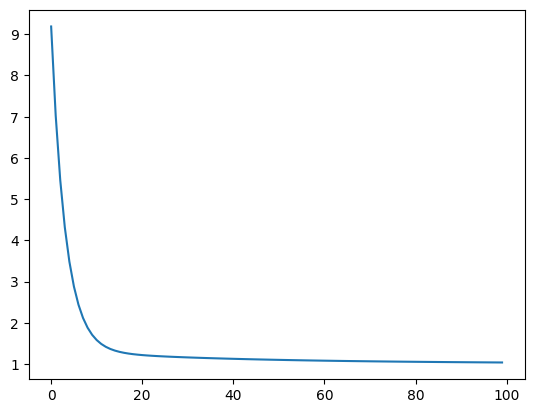

In [14]:
graph_x_grad = np.array([i for i in range (len(cost_grad))])
plt.plot(graph_x_grad, cost_grad)

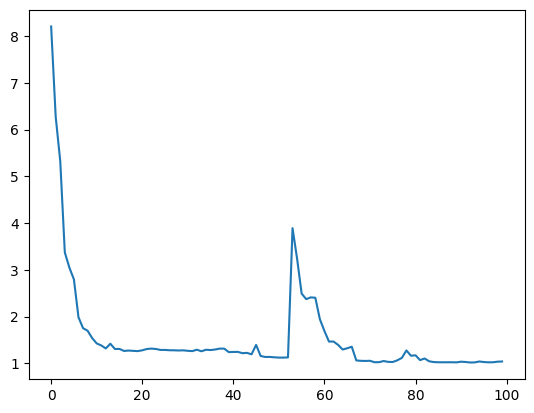

In [15]:
graph_x_stoc = np.array([i for i in range (len(cost_stoc))])
plt.plot(graph_x_stoc, cost_stoc)

In [16]:
testT = test_data.to_numpy()[:, 2:]
testX = test_data.to_numpy()[:, :2]
testX = np.concatenate((np.ones([len(testX), 1]), testX), axis=1)
costFunction(testX, testT, W_grad)
costFunction(testX, testT, W_stoc)

1.268907311430571

In [51]:
def predict(X, W):
    X = np.reshape(X, (1, len(X)))
    X = np.concatenate((np.ones([1,1]), X), axis=1)
    return np.sum(X @ W)

In [52]:
trialX = np.array((5.799, 2.93))
predict(trialX, W_grad), predict(trialX, W_stoc)

(6.806317052434703, 6.99585969142956)